# EDA for Credit Card Dataset

This notebook is organized into the following sections:

1. Install Dependencies
2. Imports
3. Load Data
4. Data Inspection
5. Data Cleaning
6. Descriptive Statistics
7. Correlation Analysis
8. Correlation Heatmap
9. Collinearity Analysis (VIF)
10. Feature-Target Separation and Train/Validation/Test Split

## 1) Install Dependencies

In [1]:
%pip install scikit-learn statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## 2) Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

## 3) Load Data

In [3]:
# Load the dataset
df = pd.read_csv('data/UCI_Credit_card.csv')

# Initial inspection
print('Data shape:', df.shape)
print(df.head())

Data shape: (30000, 25)
   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  


## 4) Data Inspection

In [4]:
# Data types
print(df.dtypes)

# Missing values
print('\nMissing values:')
print(df.isnull().sum())

# Duplicate rows
num_duplicates = df.duplicated().sum()
print(f'\nNumber of duplicate rows: {num_duplicates}')
df = df.drop_duplicates()

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

Missing values:
ID                 

## 5) Data Cleaning

In [5]:
# Drop irrelevant columns
df = df.drop(columns=['ID'])

# Recode EDUCATION: 0, 5, 6 -> 4
df['EDUCATION'] = df['EDUCATION'].replace({0: 4, 5: 4, 6: 4})

# Recode MARRIAGE: 0 -> 3
df['MARRIAGE'] = df['MARRIAGE'].replace({0: 3})

# Inspect cleaned data
print('After cleaning, shape:', df.shape)
print(df.head())

After cleaning, shape: (30000, 24)
   LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0    20000.0    2          2         1   24      2      2     -1     -1   
1   120000.0    2          2         2   26     -1      2      0      0   
2    90000.0    2          2         2   34      0      0      0      0   
3    50000.0    2          2         1   37      0      0      0      0   
4    50000.0    1          2         1   57     -1      0     -1      0   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -2  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1      0  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2      0  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3      0  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4      0  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  

## 6) Descriptive Statistics

In [6]:
print(df.describe())

            LIMIT_BAL           SEX     EDUCATION      MARRIAGE           AGE  \
count    30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean    167484.322667      1.603733      1.842267      1.557267     35.485500   
std     129747.661567      0.489129      0.744494      0.521405      9.217904   
min      10000.000000      1.000000      1.000000      1.000000     21.000000   
25%      50000.000000      1.000000      1.000000      1.000000     28.000000   
50%     140000.000000      2.000000      2.000000      2.000000     34.000000   
75%     240000.000000      2.000000      2.000000      2.000000     41.000000   
max    1000000.000000      2.000000      4.000000      3.000000     79.000000   

              PAY_0         PAY_2         PAY_3         PAY_4         PAY_5  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      -0.016700     -0.133767     -0.166200     -0.220667     -0.266200   
std        1.123802      1.197186

## 7) Correlation Analysis

In [7]:
# Compute correlation matrix for numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
corr_matrix = df[numeric_cols].corr()
print('Correlation Matrix:') 
print(corr_matrix)

# Identify highly correlated pairs (|corr| > 0.8)
threshold = 0.8
high_corr_pairs = [
    (numeric_cols[i], numeric_cols[j], corr_matrix.iloc[i, j])
    for i in range(len(numeric_cols))
    for j in range(i + 1, len(numeric_cols))
    if abs(corr_matrix.iloc[i, j]) > threshold
]
if high_corr_pairs:
    print(f'\nHighly correlated pairs (|corr| > {threshold}):')
    for var1, var2, val in high_corr_pairs:
        print(f'{var1} - {var2}: {val:.2f}')
else:
    print(f'\nNo pairs with |corr| > {threshold}')

Correlation Matrix:
                            LIMIT_BAL       SEX  EDUCATION  MARRIAGE  \
LIMIT_BAL                    1.000000  0.024755  -0.231088 -0.111012   
SEX                          0.024755  1.000000   0.013627 -0.028522   
EDUCATION                   -0.231088  0.013627   1.000000 -0.136797   
MARRIAGE                    -0.111012 -0.028522  -0.136797  1.000000   
AGE                          0.144713 -0.090874   0.182434 -0.412001   
PAY_0                       -0.271214 -0.057643   0.112593  0.018557   
PAY_2                       -0.296382 -0.070771   0.129703  0.023620   
PAY_3                       -0.286123 -0.066096   0.122425  0.032399   
PAY_4                       -0.267460 -0.060173   0.116531  0.031831   
PAY_5                       -0.249411 -0.055064   0.104088  0.034377   
PAY_6                       -0.235195 -0.044008   0.088986  0.033168   
BILL_AMT1                    0.285430 -0.033642   0.016597 -0.027832   
BILL_AMT2                    0.278314 -0.031

## 8) Correlation Heatmap

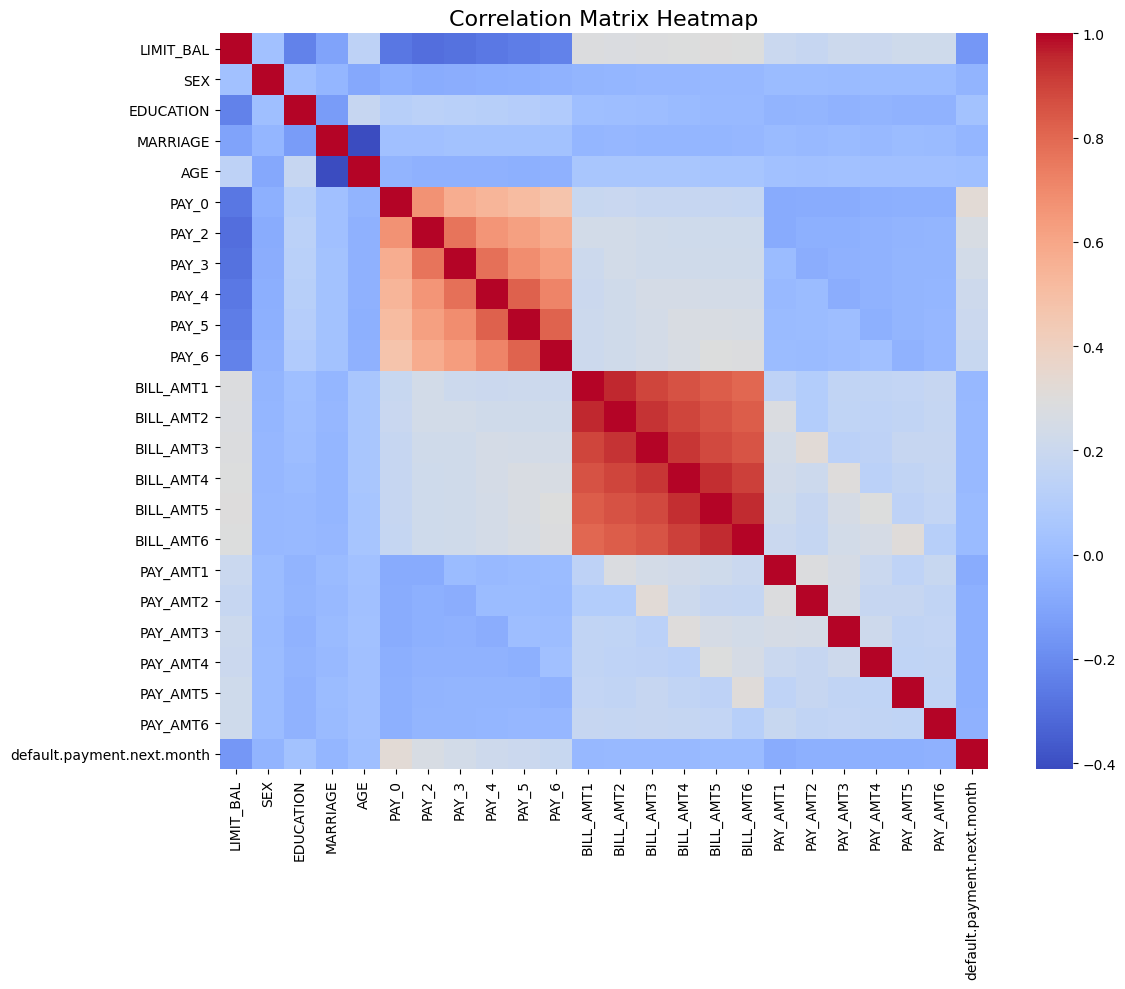

In [8]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt='.2f',
            xticklabels=numeric_cols, yticklabels=numeric_cols)
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

## 9) Collinearity Analysis (VIF)

In [9]:
# Calculate Variance Inflation Factor (VIF)
X = df[numeric_cols].dropna().copy()
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [
    variance_inflation_factor(X.values, i) 
    for i in range(X.shape[1])
]
print(vif_data)

                       Feature        VIF
0                    LIMIT_BAL   4.045208
1                          SEX   9.150823
2                    EDUCATION   7.404078
3                     MARRIAGE   6.372034
4                          AGE  11.346002
5                        PAY_0   1.996648
6                        PAY_2   3.215562
7                        PAY_3   3.729150
8                        PAY_4   4.440306
9                        PAY_5   4.986083
10                       PAY_6   3.463773
11                   BILL_AMT1  20.843258
12                   BILL_AMT2  38.216308
13                   BILL_AMT3  31.782858
14                   BILL_AMT4  29.548131
15                   BILL_AMT5  35.988405
16                   BILL_AMT6  21.426343
17                    PAY_AMT1   1.908626
18                    PAY_AMT2   2.385017
19                    PAY_AMT3   1.911656
20                    PAY_AMT4   1.805152
21                    PAY_AMT5   1.854481
22                    PAY_AMT6   1

## 10) Feature-Target Separation and Train/Validation/Test Split

In [10]:
target_col = 'default.payment.next.month'
X = df.drop(columns=[target_col])
y = df[target_col]

# Split 60% train, 20% val, 20% test
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, 
    train_size=0.6, 
    stratify=y, 
    random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, 
    test_size=0.5, 
    stratify=y_temp, 
    random_state=42
)

# Display shapes
print(f'Training set: X={X_train.shape}, y={y_train.shape}')
print(f'Validation set: X={X_val.shape}, y={y_val.shape}')
print(f'Test set: X={X_test.shape}, y={y_test.shape}')

Training set: X=(18000, 23), y=(18000,)
Validation set: X=(6000, 23), y=(6000,)
Test set: X=(6000, 23), y=(6000,)
